## California Housing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor


**Get the data. Make a copy.**

In [2]:
housing_data = pd.read_csv("housing.csv")
data = housing_data.copy()

**Split the data into test and training sets.**<br/> We also considered splitting the data into training and test sets after the "preprocessing" stage, since our "preprocessing" stage involves dropping observations based on certain conditions. We came to the conclusion that postponing splitting the data would be more efficient. <br/>This is still in consideration.....

In [3]:
#data_train, data_test = train_test_split(data, test_size=0.20, random_state=11)
data_train = data
# Remember to change this, or else change the variables up to the split as 'data' and not 'data_train'
data_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Getting a grasp on our data

In [4]:
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


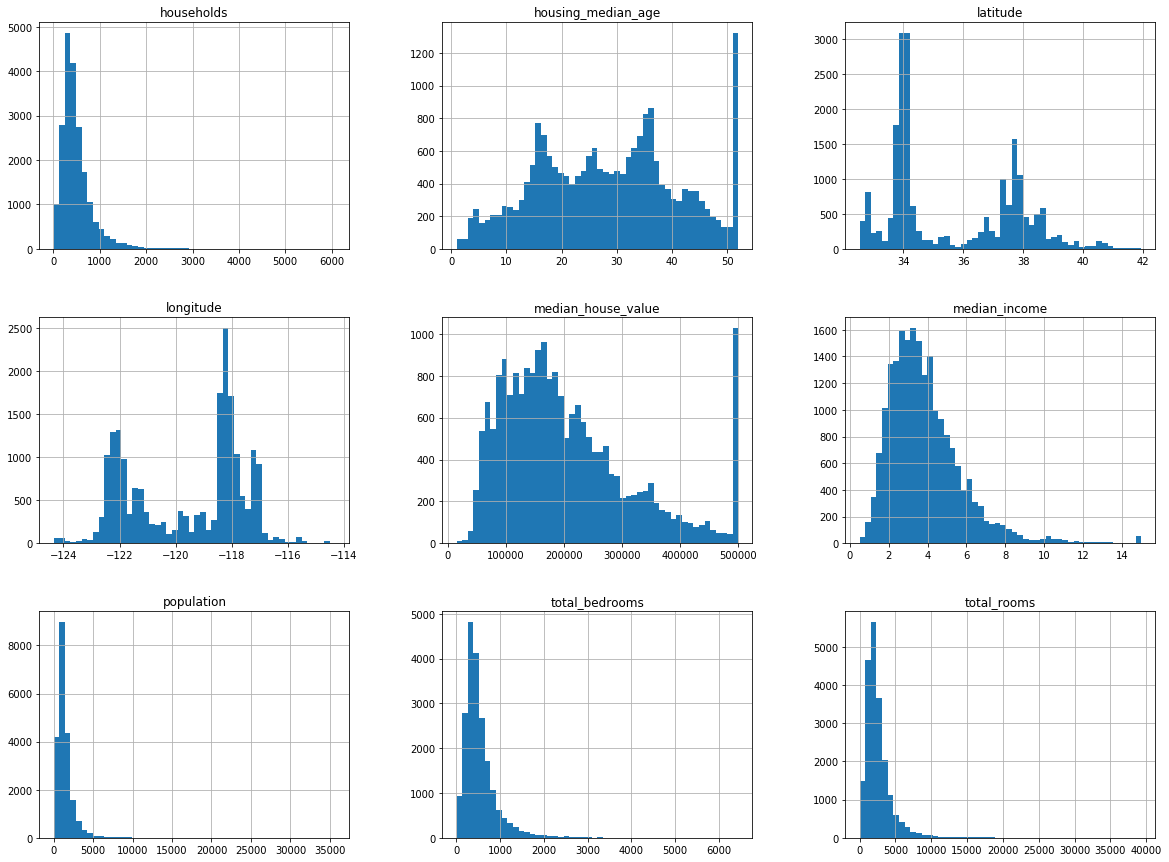

In [5]:
data_train.hist(bins=50,figsize=(20,15))
plt.show()

<br/>**Visualizing high-density areas**<br/>

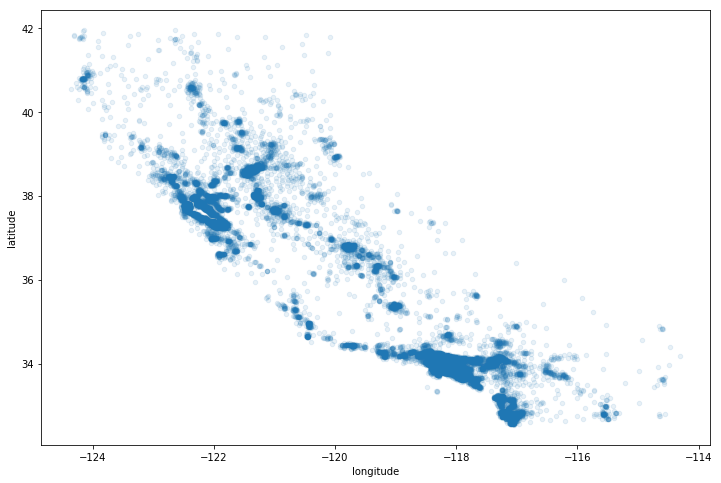

In [6]:
data_train.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,figsize=(12,8));

**Looking for correlations**

In [7]:
corr_matrix = data_train.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [8]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Cleaning the data##
<br/> Deal with NaN or missing values. <br/> Deal with categorical data.

Do we have any missing values?

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Mariano had a look at the csv data and searched for empty values. We were able to confirm that there are 207 empty values (in the given data set) for total_bedrooms. Let's get rid of these!

In [10]:
data_train = data_train.dropna(axis=0,how='any')

We also have capped values for the median_house_value which can improperly influence our experiment/model/results. Since we cannot reconstruct these missing labels, we opted to drop them from the training data. This is also the case for capped values of housing_median_age.

In [11]:
data_train['median_house_value'].max()

500001.0

In [12]:
data_train = data_train.drop(data_train[(data_train['median_house_value'] > 500000) == True].index)

In [13]:
data_train['housing_median_age'].max()

52.0

In [14]:
data_train = data_train.drop(data_train[(data_train['housing_median_age'] > 51) == True].index)

In [15]:
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY


** One hot encoding for the ocean_proximity feature**<br/>

In [16]:
data_train['ocean_proximity'].value_counts()

<1H OCEAN     8235
INLAND        6290
NEAR OCEAN    2303
NEAR BAY      1549
ISLAND           2
Name: ocean_proximity, dtype: int64

In [17]:
housing_cat = data_train['ocean_proximity']
housing_cat_encoded,housing_categories = housing_cat.factorize()

In [18]:
housing_categories

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

In [19]:
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [20]:
housing_cat_1hot

<18379x5 sparse matrix of type '<class 'numpy.float64'>'
	with 18379 stored elements in Compressed Sparse Row format>

In [21]:
housing_cat_1hot = housing_cat_1hot.toarray()

In [22]:
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY


## Feature Scaling ##

<br/> We opted for standardization as opposed to normalization. <br/> Does it make sense to scale the labels (median_house_value)??

In [23]:
# Try not scaling the target/output/labels

data_labels = pd.DataFrame(data_train['median_house_value'])
data_no_labels = data_train.drop(['median_house_value'],axis=1)
data_no_labels.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,NEAR BAY
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,NEAR BAY
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,NEAR BAY


In [24]:
data_labels.head()

,median_house_value
0,452600.0
1,358500.0
8,226700.0
15,140000.0
18,158700.0


In [25]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_no_labels.iloc[:,:-1])
data_scaled

array([[0.20720721, 0.5674814 , 0.8       , ..., 0.00894083, 0.02039474,
        0.53966842],
       [0.20820821, 0.565356  , 0.4       , ..., 0.0672104 , 0.18684211,
        0.53802706],
       [0.2042042 , 0.56323061, 0.82      , ..., 0.03371731, 0.09753289,
        0.1089985 ],
       ...,
       [0.30830831, 0.73219979, 0.32      , ..., 0.0281398 , 0.07088816,
        0.08276438],
       [0.2982983 , 0.73219979, 0.34      , ..., 0.02068444, 0.05707237,
        0.09429525],
       [0.30630631, 0.72582359, 0.3       , ..., 0.03879032, 0.08684211,
        0.13025338]])

In [26]:
df_scaled = pd.DataFrame(data_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7
0,0.207207,0.567481,0.80,0.022331,0.019711,0.008941,0.020395,0.539668
1,0.208208,0.565356,0.40,0.180503,0.171349,0.067210,0.186842,0.538027
2,0.204204,0.563231,0.82,0.064932,0.102902,0.033717,0.097533,0.108998
3,0.204204,0.564293,0.98,0.028435,0.043613,0.019451,0.043092,0.112074
4,0.204204,0.563231,0.98,0.056895,0.070309,0.027663,0.068586,0.102840


In [27]:
df_labels = pd.DataFrame(data_labels)
df_labels = df_labels.reset_index(drop=True)
df_labels.head()

,median_house_value
0,452600.0
1,358500.0
2,226700.0
3,140000.0
4,158700.0


## Putting the pieces together##
<br/> Create a dataframe with the scaled values. <br/> Add the encoded 5 rows to said dataframe. <br/> Check it out roughly to see if it makes sense.

In [28]:


#data_scaled.columns = (data.iloc[:,:-5]).columns.....why is this giving me an error?!?!

In [29]:
ocean_proximity_cat_1hot = pd.DataFrame(housing_cat_1hot)

In [30]:
ocean_proximity_cat_1hot = ocean_proximity_cat_1hot.rename(columns=
                            {0: 'NEAR BAY', 1: '<1H OCEAN', 2:'INLAND', 3:'NEAR OCEAN', 4:'ISLAND'})

In [31]:
df_scaled = pd.concat([df_scaled, ocean_proximity_cat_1hot], axis=1, sort=False)

In [32]:
df_scaled.head()

,0,1,2,3,4,5,6,7,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,0.207207,0.567481,0.80,0.022331,0.019711,0.008941,0.020395,0.539668,1.0,0.0,0.0,0.0,0.0
1,0.208208,0.565356,0.40,0.180503,0.171349,0.067210,0.186842,0.538027,1.0,0.0,0.0,0.0,0.0
2,0.204204,0.563231,0.82,0.064932,0.102902,0.033717,0.097533,0.108998,1.0,0.0,0.0,0.0,0.0
3,0.204204,0.564293,0.98,0.028435,0.043613,0.019451,0.043092,0.112074,1.0,0.0,0.0,0.0,0.0
4,0.204204,0.563231,0.98,0.056895,0.070309,0.027663,0.068586,0.102840,1.0,0.0,0.0,0.0,0.0


In [33]:
# Add back in the labels.....

df_scaled = pd.concat([df_scaled,df_labels],axis=1,sort=False)
df_scaled.head()

,0,1,2,3,4,5,6,7,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,median_house_value
0,0.207207,0.567481,0.80,0.022331,0.019711,0.008941,0.020395,0.539668,1.0,0.0,0.0,0.0,0.0,452600.0
1,0.208208,0.565356,0.40,0.180503,0.171349,0.067210,0.186842,0.538027,1.0,0.0,0.0,0.0,0.0,358500.0
2,0.204204,0.563231,0.82,0.064932,0.102902,0.033717,0.097533,0.108998,1.0,0.0,0.0,0.0,0.0,226700.0
3,0.204204,0.564293,0.98,0.028435,0.043613,0.019451,0.043092,0.112074,1.0,0.0,0.0,0.0,0.0,140000.0
4,0.204204,0.563231,0.98,0.056895,0.070309,0.027663,0.068586,0.102840,1.0,0.0,0.0,0.0,0.0,158700.0


In [34]:
df_scaled.rename(columns={0: 'longitude', 1:'latitude',2:'housing_median_age',3:'total_rooms',
                          4:'total_bedrooms',5:'population',6:'households',7:'median_income'}, inplace=True)



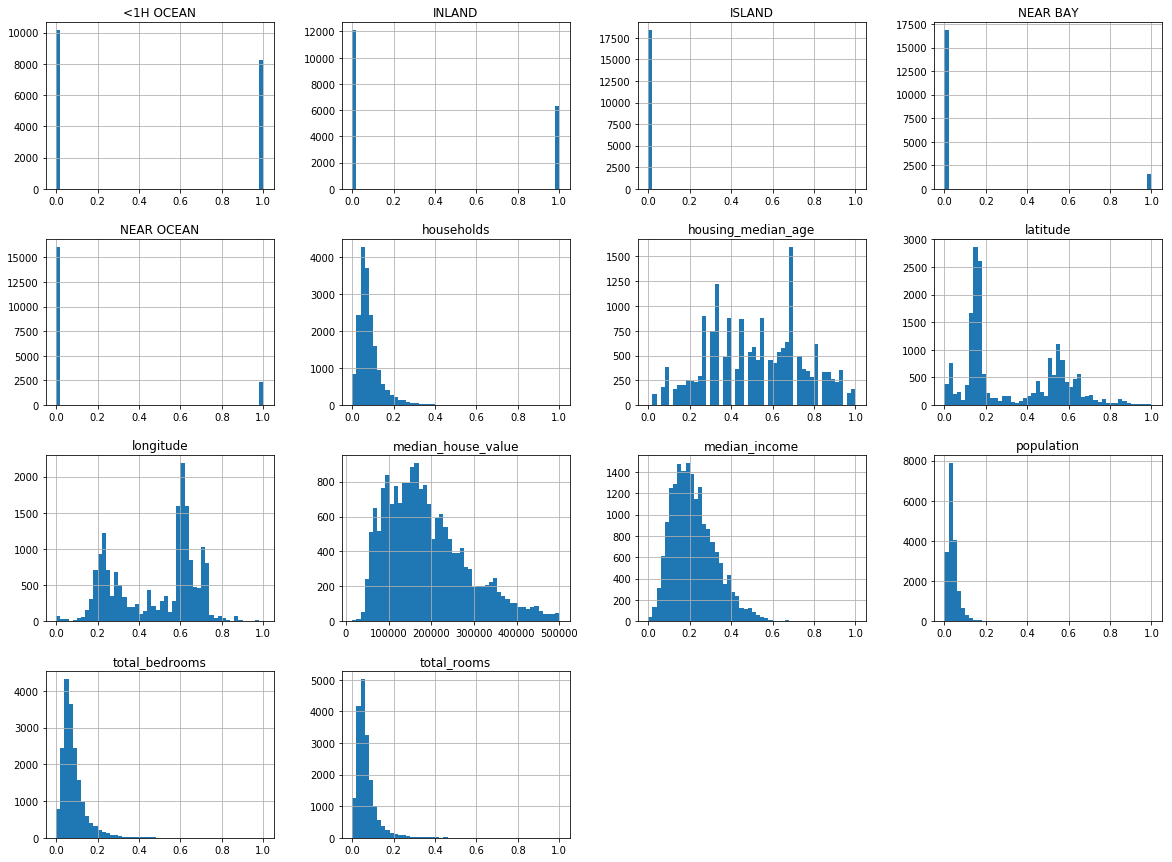

In [35]:
df_scaled.hist(bins=50,figsize=(20,15));

In [36]:
df_scaled['ISLAND'].value_counts()

0.0    18377
1.0        2
Name: ISLAND, dtype: int64

**Where did the other 3 islands go?**<br/>(And can we got there, too?)<br/>They were dropped because the housing_median_age was greater than 51.

## FINALLY.... let's split it up, yo!

In [37]:
df_scaled.shape

(18379, 14)

In [38]:
data_training, data_testing = train_test_split(df_scaled, test_size=0.20, random_state=11)

In [39]:
data_training.shape

(14703, 14)

In [40]:
data_testing.shape

(3676, 14)

In [41]:
data_training.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,median_house_value
4237,0.601602,0.159405,0.94,0.034361,0.075431,0.054430,0.079770,0.133515,0.0,1.0,0.0,0.0,0.0,123700.0
16086,0.225225,0.512221,0.56,0.044026,0.039267,0.018947,0.045395,0.485083,0.0,1.0,0.0,0.0,0.0,406800.0
3354,0.588589,0.175345,0.64,0.085228,0.122303,0.064884,0.127138,0.121309,0.0,1.0,0.0,0.0,0.0,269700.0
116,0.208208,0.557917,0.86,0.037769,0.048425,0.026851,0.044408,0.207976,1.0,0.0,0.0,0.0,0.0,109500.0
13630,0.735736,0.028693,0.60,0.032428,0.045165,0.019479,0.038651,0.180046,0.0,1.0,0.0,0.0,0.0,147700.0


In [42]:
# Establish the labels/output
data_training_labels = data_training['median_house_value']

# Drop the output from our training data set for the model
data_training_no_labels = data_training.drop(['median_house_value'],axis=1)

# Establish the labels/output
data_testing_labels = data_testing['median_house_value']

# Drop the output from our training data set for the model
data_testing_no_labels = data_testing.drop(['median_house_value'],axis=1)


## Linear Regression - Multivariate## 
**<br/>Now that the data is split up, we can start to create a model.**

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(data_training_no_labels,data_training_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Try out the model with a bit of training data, quick & dirty, just to get a feel for it**

In [44]:
trial_data_no_labels = data_training_no_labels.iloc[:10]
trial_labels = data_training_labels.iloc[:10]


In [45]:
print ("Trial predictions: ",lin_reg.predict(trial_data_no_labels))

Trial predictions:  [162304. 369664. 160256. 199936. 183296. 132352. 114432. 140288. 252672.
 210432.]


In [46]:
print ("Trial labels: ", trial_labels)

Trial labels:  4237     123700.0
16086    406800.0
3354     269700.0
116      109500.0
13630    147700.0
9023     137500.0
10864     71300.0
12990    137500.0
5546     297600.0
4421     140300.0
Name: median_house_value, dtype: float64


** Measure the regression model for the quick & dirty trial **

In [64]:
def error_tests (data_labels, predictions):
    print ('Mean Squared Error:'+ str(mean_squared_error(data_labels,predictions)))
    print('Root Mean Squared Error: ' + str(np.sqrt(mean_squared_error(data_labels,predictions))))
    print('R Squared: ' + str(r2_score(data_labels,predictions)))

In [65]:
trial_predictions = lin_reg.predict(trial_data_no_labels)
error_tests(trial_labels,trial_predictions)

Mean Squared Error:3312475264.0
Root Mean Squared Error: 57554.107273069574
R Squared: 0.6665132568539411


Based on the quick & dirty trial using the training data, our model has a typical prediction error of $57,554. Ugh.

**Using the test data**

In [49]:
lin_predictions = lin_reg.predict(data_testing_no_labels)
error_tests(data_testing_labels,lin_predictions)

Mean Squared Error:3630372925.1841674
Root Mean Squared Error: 60252.57608753478
R Squared: 0.6138535624184537


This means our model has a typical prediction error of $60,252. That's not great.

## Linear Regression with two variables##
** After the motto, "Location, location, location," let's try just using the latitude and longitude as predictors.**

In [50]:
# Drop the output from our training data set for the model
location_training_no_labels = data_training[['latitude', 'longitude']]

In [51]:
lin_reg_location = LinearRegression()
lin_reg_location.fit(location_training_no_labels,data_training_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
location_testing_no_labels = data_testing[['latitude','longitude']]
location_predictions = lin_reg_location.predict(location_testing_no_labels)

In [53]:
error_tests(data_testing_labels,location_predictions)

Mean Squared Error:6886497058.338287
Root Mean Squared Error: 82984.92066838582
R Squared: 0.2675142853655379


That's even worse. Let's try another model. And then look at feature engineering.

## K Neighbors Regression

In [54]:
neigh = KNeighborsRegressor(n_neighbors=9)
neigh.fit(data_training_no_labels,data_training_labels)
knr_predictions = neigh.predict(data_testing_no_labels)


In [55]:
error_tests(data_testing_labels,knr_predictions)

Mean Squared Error:3108022741.7391458
Root Mean Squared Error: 55749.64342252913
R Squared: 0.6694136017488842


In [56]:
data_training_no_labels.shape

(14703, 13)

In [57]:
new_df = pd.DataFrame(knr_predictions)
new_labels = data_testing_labels.reset_index(drop=True)
new_df = pd.concat([new_df,new_labels],axis=1,sort=False)


<IPython.core.display.Javascript object>


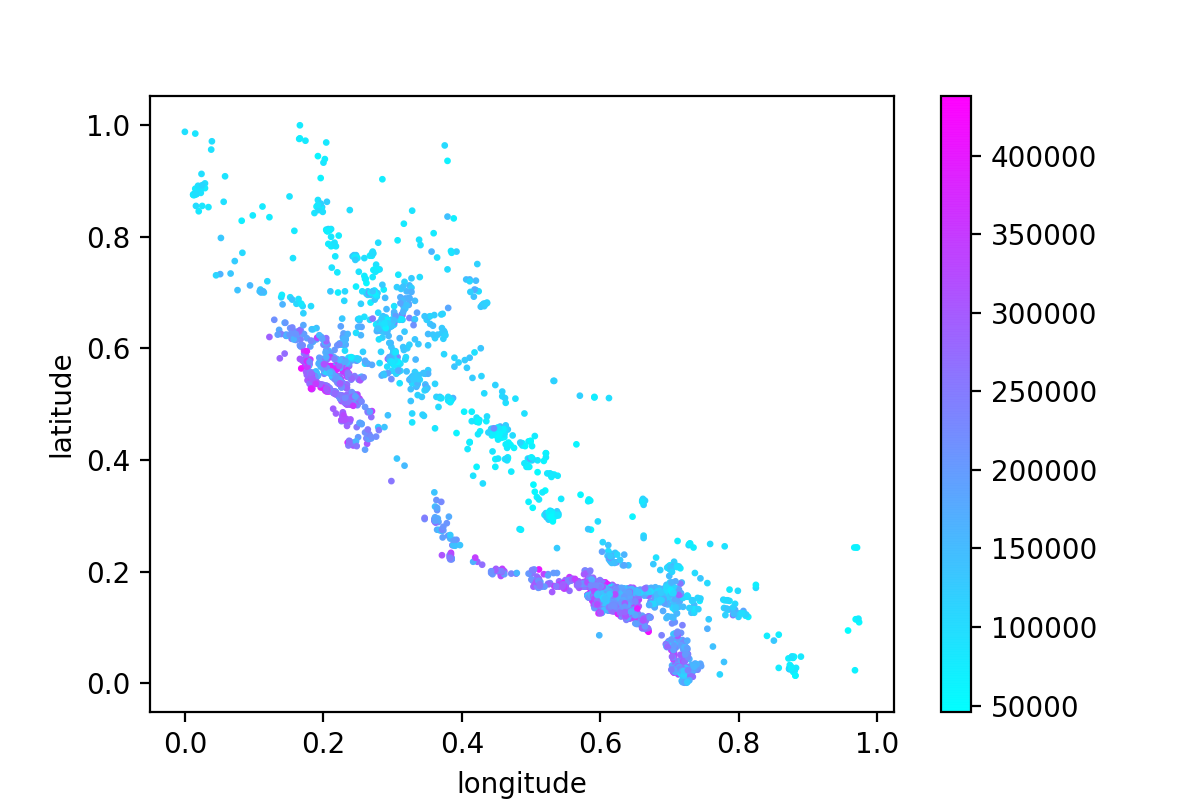

In [63]:
%matplotlib notebook

data_testing.plot(kind='scatter',x='longitude',y='latitude',c=knr_predictions,alpha=0.99,figsize=(6,4),s=2,cmap='cool');


<IPython.core.display.Javascript object>


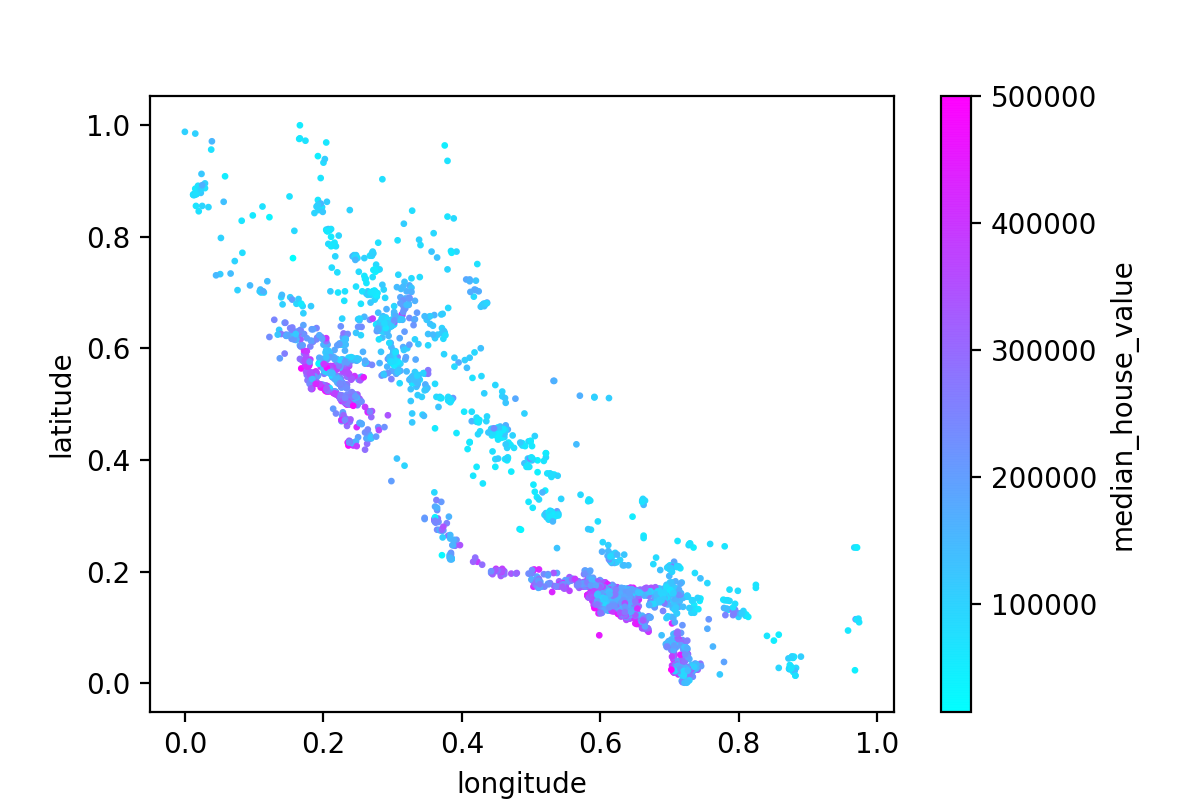

In [59]:
%matplotlib notebook

data_testing.plot(kind='scatter',x='longitude',y='latitude',c='median_house_value',alpha=0.99,figsize=(6,4),s=2,cmap='cool');
